# 房屋經緯畫台北市地圖

In [19]:
import requests
from bs4 import BeautifulSoup
headers = {
   'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36' 
}
res = requests.get('https://sale.591.com.tw/home/house/detail/2/5448818.html', headers = headers, verify=False)
res

C:\Users\irvingfong\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Response [200]>

In [20]:
soup = BeautifulSoup(res.text, 'lxml')
lon, lat = soup.select_one('.detail-map-box iframe').get('src').split('q=')[1].split('&')[0].split(',')

In [21]:
lon, lat

('25.0431252', '121.5432053')

# Data Cleaning

In [23]:
import pandas as pd

In [24]:
house = pd.read_csv('591.csv',index_col=0)

In [25]:
house.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518


In [37]:
house = house[['address', 'latitude', 'longitude']]

In [38]:
taipei = house[house['address'].str.contains('台北市')]

In [39]:
taipei[['city','area']] = taipei['address'].str.extract('(台北市)(.*?區)')

C:\Users\irvingfong\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [50]:
taipei.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13190 entries, 11 to 53170
Data columns (total 5 columns):
address      13190 non-null object
latitude     13190 non-null float64
longitude    13190 non-null float64
city         13190 non-null object
area         13190 non-null object
dtypes: float64(2), object(3)
memory usage: 618.3+ KB


In [65]:
# 剔除很遠的房子
taipei = taipei[taipei['longitude'] > 30]

In [52]:
X = taipei.loc[:,['longitude','latitude']]

In [53]:
area = taipei['area']

In [54]:
area.value_counts()

中山區    2569
大安區    2227
信義區    1421
內湖區    1271
松山區    1081
士林區    1017
中正區     976
北投區     648
大同區     639
文山區     461
萬華區     458
南港區     422
Name: area, dtype: int64

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(taipei['area'].values)

In [71]:
y

array([ 9,  4, 10, ...,  8,  2,  5], dtype=int64)

In [68]:
from sklearn.cluster import KMeans
kmeans   = KMeans(n_clusters = 12, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Data Visualiation

In [69]:
import matplotlib.pyplot as plt

cmap = plt.cm.get_cmap('tab20')

rgba = cmap(4)
rgba

(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)

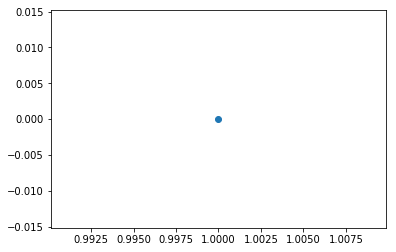

In [82]:
plt.scatter(1,0)

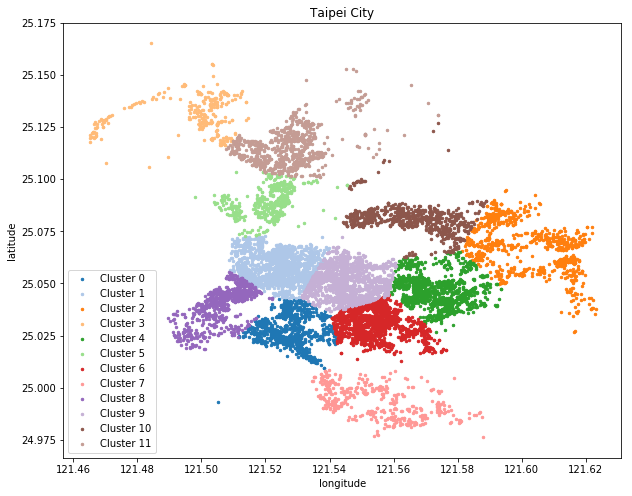

In [89]:
# kmeans預測的
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
for i in range(0,12):
    plt.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1], s = 6, c = cmap(i), label = 'Cluster {}'.format(i))

plt.title('Taipei City')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()

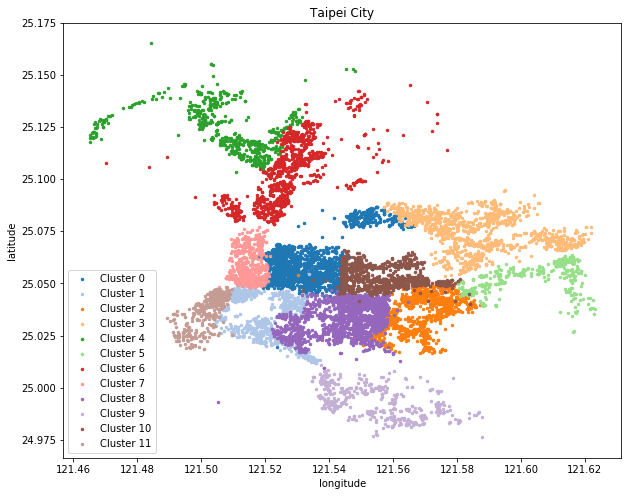

In [81]:
# 原始的
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
for i in range(0,12):
    plt.scatter(X.values[y == i, 0], X.values[y == i, 1], s = 6, c = cmap(i), label = 'Cluster {}'.format(i))

plt.title('Taipei City')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()